In [231]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import re
from sklearn import preprocessing

In [232]:
from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten, LSTM
from keras.layers import GlobalMaxPooling1D
from keras.models import Model
from keras.layers.embeddings import Embedding
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.layers import Input
from keras.layers.merge import Concatenate
from keras.layers import Bidirectional, RepeatVector

In [233]:
inputData = pd.read_csv("/home/gaurav/Desktop/UPCON2020/code/phase2.csv")

In [234]:
inputData.head()

,Unnamed: 0,bodyMovePoint,bodyPositionForwarePlus,damping,height,incline,index,landPull,legMovePoint,liftPush,sit,stride,swayBody,swayFoot,swayShift,timeStep
0,0,8,5,0.0,50,0.0,1.0,0.5,8,0.3,40,80,30,0,3,0.06
1,1,8,5,0.0,50,0.0,2.0,0.6,8,0.3,40,80,30,0,3,0.06
2,2,8,5,0.0,50,0.0,3.0,0.7,8,0.3,40,80,30,0,3,0.06
3,3,8,5,0.0,50,0.0,4.0,0.5,8,0.3,43,80,30,0,3,0.06
4,4,8,5,0.0,50,0.0,5.0,0.6,8,0.3,43,80,30,0,3,0.06


In [235]:
inputData = inputData.loc[:, ("bodyMovePoint","legMovePoint","height","stride","sit","swayBody","swayFoot","bodyPositionForwarePlus","swayShift",
"liftPush","landPull","timeStep","damping","incline")]

In [236]:
inputData.head()

,bodyMovePoint,legMovePoint,height,stride,sit,swayBody,swayFoot,bodyPositionForwarePlus,swayShift,liftPush,landPull,timeStep,damping,incline
0,8,8,50,80,40,30,0,5,3,0.3,0.5,0.06,0.0,0.0
1,8,8,50,80,40,30,0,5,3,0.3,0.6,0.06,0.0,0.0
2,8,8,50,80,40,30,0,5,3,0.3,0.7,0.06,0.0,0.0
3,8,8,50,80,43,30,0,5,3,0.3,0.5,0.06,0.0,0.0
4,8,8,50,80,43,30,0,5,3,0.3,0.6,0.06,0.0,0.0


In [237]:
inputData.tail()

,bodyMovePoint,legMovePoint,height,stride,sit,swayBody,swayFoot,bodyPositionForwarePlus,swayShift,liftPush,landPull,timeStep,damping,incline
211,8,8,50,105,43,30,0,5,3,0.5,0.6,0.06,0.0,0.0
212,8,8,50,105,43,30,0,5,3,0.5,0.7,0.06,0.0,0.0
213,8,8,50,105,45,30,0,5,3,0.5,0.5,0.06,0.0,0.0
214,8,8,50,105,45,30,0,5,3,0.5,0.6,0.06,0.0,0.0
215,8,8,50,105,45,30,0,5,3,0.5,0.7,0.06,0.0,0.0


In [238]:
inputData.shape

(216, 14)

In [239]:
min_max_scaler = preprocessing.MinMaxScaler()

In [240]:
inputData = min_max_scaler.fit_transform(inputData)

In [241]:
inputData.shape

(216, 14)

In [242]:
inputData = pd.DataFrame(inputData)

In [243]:
inputData.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
count,216.0,216.0,216.0,216.000000,216.000000,216.0,216.0,216.0,216.0,216.000000,216.000000,216.0,216.0,216.0
mean,0.0,0.0,0.0,0.500000,0.533333,0.0,0.0,0.0,0.0,0.500000,0.500000,0.0,0.0,0.0
std,0.0,0.0,0.0,0.328087,0.411916,0.0,0.0,0.0,0.0,0.409197,0.409197,0.0,0.0,0.0
min,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.250000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.500000,0.600000,0.0,0.0,0.0,0.0,0.500000,0.500000,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.750000,1.000000,0.0,0.0,0.0,0.0,1.000000,1.000000,0.0,0.0,0.0
max,0.0,0.0,0.0,1.000000,1.000000,0.0,0.0,0.0,0.0,1.000000,1.000000,0.0,0.0,0.0


In [258]:
inputData.head(50)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.0,0.0,0.0,0.285714,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.285714,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0
2,0.0,0.0,0.0,0.285714,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.285714,0.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.285714,0.6,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0
5,0.0,0.0,0.0,0.285714,0.6,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.285714,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.285714,1.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0
8,0.0,0.0,0.0,0.285714,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.428571,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [245]:
inputData.tail()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
211,0.0,0.0,0.0,1.0,0.6,0.0,0.0,0.0,0.0,1.0,0.5,0.0,0.0,0.0
212,0.0,0.0,0.0,1.0,0.6,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
213,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
214,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.5,0.0,0.0,0.0
215,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


In [250]:
x = inputData.values
y = list()
x_len = len(x)

In [251]:
x = x.reshape(216,1,14)

In [252]:
print(x.shape)

(216, 1, 14)


In [253]:
global_x = 0

In [254]:
def dataGenerator(batch_size=3):
    while True:
        x_batch = []
        y_batch = []
        global global_x
        for b in range(batch_size):
            x_batch.append(x[(global_x + b)%(x_len)])
            t = pd.read_csv("/home/gaurav/Desktop/UPCON2020/code/data2/"+str((global_x+b)%(x_len)+1)+".csv")
            y_batch.append(t.values)
        x_batch = np.array(x_batch)
        y_batch = np.array(y_batch)
        global_x += batch_size
        yield (x_batch,y_batch)

In [255]:
from keras.regularizers import l2

In [256]:
model = Sequential()
model.add(LSTM(50, input_shape=(None, 14)))
#model.add(Dropout(0.2))
model.add(RepeatVector(64))
model.add(Dense(12, activation="relu", kernel_regularizer=l2(0.01)))
model.compile(optimizer='adam',loss='mse')
model.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_14 (LSTM)               (None, 50)                13000     
_________________________________________________________________
repeat_vector_11 (RepeatVect (None, 64, 50)            0         
_________________________________________________________________
dense_11 (Dense)             (None, 64, 12)            612       
Total params: 13,612
Trainable params: 13,612
Non-trainable params: 0
_________________________________________________________________


In [257]:
model.fit(dataGenerator(),steps_per_epoch=x_len/10,epochs=100)

Epoch 1/100
22/21 [==============================] - 1s 60ms/step - loss: 0.6217
Epoch 2/100
22/21 [==============================] - 0s 17ms/step - loss: 0.5555
Epoch 3/100
22/21 [==============================] - 0s 14ms/step - loss: 0.4817
Epoch 4/100
22/21 [==============================] - 1s 25ms/step - loss: 0.4152
Epoch 5/100
22/21 [==============================] - 0s 7ms/step - loss: 0.3430
Epoch 6/100
22/21 [==============================] - 0s 13ms/step - loss: 0.3086
Epoch 7/100
22/21 [==============================] - 1s 23ms/step - loss: 0.2733
Epoch 8/100
22/21 [==============================] - 0s 17ms/step - loss: 0.2482
Epoch 9/100
22/21 [==============================] - 0s 18ms/step - loss: 0.2518
Epoch 10/100
22/21 [==============================] - 0s 16ms/step - loss: 0.2334
Epoch 11/100
22/21 [==============================] - 0s 15ms/step - loss: 0.2253
Epoch 12/100
22/21 [==============================] - 0s 18ms/step - loss: 0.2241
Epoch 13/100
22/21 [======

In [259]:
x.shape

(216, 1, 14)

In [260]:
lstm_pred = LSTMmodel.predict(x)

In [261]:
lstm_pred.shape

(216, 64, 12)

In [262]:
angle = 1
dtpt = 82
t = pd.read_csv("/home/gaurav/Desktop/UPCON2020/code/data2/"+str(dtpt)+".csv")
t = t.values

In [263]:
tp = list()
lp = list()
for i in range(64):
    tp.append(t[i][angle])
    lp.append(lstm_pred[dtpt][i][angle])

In [264]:
tp = pd.DataFrame(tp)

In [265]:
tp.shape

(64, 1)

In [266]:
lp = pd.DataFrame(lp)

In [267]:
lp.shape

(64, 1)

<function matplotlib.pyplot.show(*args, **kw)>

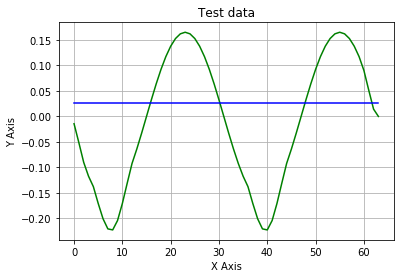

In [268]:
plt.plot(tp, color='green')
plt.plot(lp, color='blue')
plt.title('Test data')
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.grid(True)
plt.show